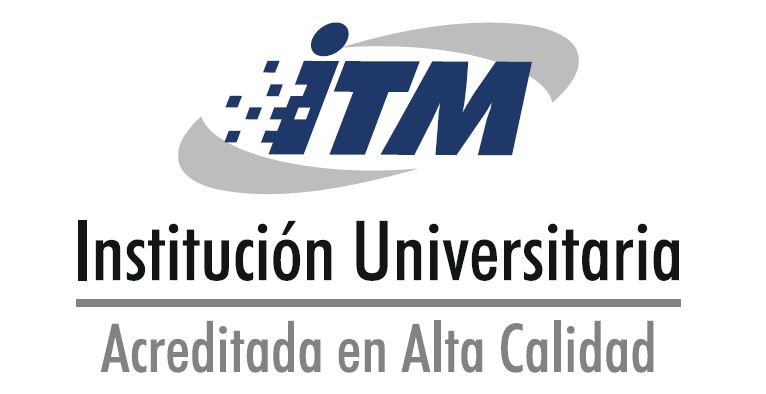

<h2>Inteligencia Artificial - IAI84</h2>

<h3>Instituto Tecnológico Metropolitano</h3>
Pedro Atencio Ortiz - 2018
<br>

<h3>Trabajo No. 2</h3>
<h4>Sobre: Algoritmos Genéticos</h4>
<br>
<h5><strong>Condiciones</strong>:</h5>
<br>
<strong>Integrantes</strong>: 2 personas máximo.
<br>
<strong>Forma de entrega</strong>: via correo electrónico a pedroatencio@itm.edu.co
<br>
<strong>Formato de entrega</strong>: jupyter notebook.
<br>
<strong>Fecha de asignación</strong>: 07 - Septiembre - 2018
<br>
<strong>Fecha de entrega</strong>: 15 - Septiembre - 2018
<br>
<br>
<strong>Descripción</strong>:
<br>
<br>
Elaborar los siguientes puntos. En cada caso se requiere entregue documentación (escrita y visual) de los experimentos realizados.
<br>
<br>
1. Implementar los problemas planteados en el archivo PDF "Taller en clase" que se encuentra dentro de la carpeta "Material complementario"->"Algoritmos geneticos". Para este punto modifique el codigo entregado en clase para que se adapte a los problemas del taller.
<br>
2. Implementar el método de selección por RULETA.
<br>
3. Aplicar el método de selección por RULETA para todos los problemas del taller y evaluar respecto a la implementación del punto 1 respecto a los siguientes criterios: 3.1. Convergencia: ¿En promedio, utilizando RULETA se disminuye o aumenta el número de epocas necesarias para que el algoritmo se estabilice? 3.2. Efectividad: ¿En promedio, RULETA permite obtener la mejor solución de forma repetida?


<br>
<br>


<strong>Integrantes</strong>
<br>
<strong>Fabio Nelson Osorio</strong>

<strong>1. Problemas basados en la Mochila:</strong>
<br>
1.1. Determinar para cada caso cuales objetos se deben llevar, maximizando la suma de los
valores de los elementos sin sobrepasar la capacidad:


<br>
<br>

<strong><h3>Ejercicio 1.1</h3></strong>
   <strong>
    <table><tr><td>Numero</td><td>1</td><td>2</td><td>3</td><td>4</td></tr>
        <tr><td>Tamaño</td><td>3</td><td>5</td><td>9</td><td>5</td></tr>
        <tr><td>Valor</td><td>45</td><td>30</td><td>45</td><td>10</td></tr>
    </table>
    <table>
        <tr><td></td><td></td><td>Capacidad maxima: 16</td><td></td><td></td></tr>
    </table>
    </strong>
    </strong>
    <strong><h3>Ejercicio 1.2</h3></strong>
   <strong>
    <table><tr><td>Numero</td><td>1</td><td>2</td><td>3</td><td>4</td><td>5</td><td>6</td><td>7</td><td>8</td></tr>
        <tr><td>Peso</td><td>2</td><td>20</td><td>20</td><td>30</td><td>40</td><td>30</td><td>60</td><td>10</td><tr>
        <tr><td>Valor</td><td>15</td><td>100</td><td>90</td><td>60</td><td>40</td><td>15</td><td>10</td><td>1</td><tr>
    </table>
     <table>
        <tr><td></td><td></td><td>Capacidad maxima: 102</td><td></td><td></td></tr>
    </table>
    </strong>
    <strong><h3>Ejercicio 1.3</h3></strong>
   <strong>
    <table><tr><td>Numero</td><td>1</td><td>2</td><td>3</td><td>4</td><td>5</td><td>6</td><td>7</td></tr>
        <tr><td>Peso</td><td>31</td><td>10</td><td>20</td><td>19</td><td>4</td><td>3</td><td>6</td></tr>
        <tr><td>Valor</td><td>70</td><td>20</td><td>39</td><td>37</td><td>7</td><td>5</td><td>10</td></tr>
    </table>
     <table>
        <tr><td></td><td></td><td>Capacidad maxima: 50</td><td></td><td></td></tr>
    </table>
    </strong>
    <strong><h3>Ejercicio 1.4</h3></strong>
   <strong>
    <table><tr><td>Numero</td><td>1</td><td>2</td><td>3</td><td>4</td><td>5</td><td>6</td><td>7</td><td>8</td></tr>
        <tr><td>Peso</td><td>25</td><td>35</td><td>45</td><td>5</td><td>25</td><td>3</td><td>2</td><td>2</td><tr>
        <tr><td>Valor</td><td>350</td><td>400</td><td>450</td><td>20</td><td>70</td><td>8</td><td>5</td><td>5</td><tr>
    </table>
     <table>
        <tr><td></td><td></td><td>Capacidad maxima: 104</td><td></td><td></td></tr>
    </table>
    </strong>
    

In [5]:
#inicia pidiendo losdatos para inicializar los parametros para realizar el algoritmo

ag=[]
cg=[]
#global ni
#global nc
global ng

#global pc
#global pm
global b # load limit constraint

def agregar():
    #globals().update({"ni":int(input("Ingrese numero de iteraciones :"))})
    #globals().update({"nc":int(input("Ingrese tamaño de la poblacion : "))})
    #globals().update({"pc":float(input("Ingrese probabilidad de cruce : "))})
    #globals().update({"pm":float(input("Ingrese probabilidad de mutacion : "))})
   
    can=int(input("Ingrese tamaño de arreglo : "))
    globals().update({"ng":can})
    globals().update({"b":int(input("Ingrese Limite: "))})
    for x in range(can):
        ag_element=int(input("Peso del elemento en la posicion : "+str(x+1)+": "))
        ag.append(ag_element)
    for x in range(can):
        cg_element=int(input("Valor del elemento en la pocicion: "+str(x+1)+": "))
        cg.append(cg_element)
    #print (ag)
    #print (cg)
        
agregar()


# Funcion de aptitud
import numpy as np
def evalbin(x):
    a=np.array([ag]) #element size array
    c=np.array([cg]) #element benefit array
    #b=16 #load limit (constraint)
    
    #1 - include element, 0 - not include element

    #if array x does not satisfy size constraint
    if (np.sum(a*x) > b):
        val=0
    else: #if it does
        val=np.sum(c*x)
    
    return val


# Se Inicailizan parametros del algoritmo

ni = 100 #numero de iteraciones
nc = 50 #tamaño de la poblacion
#ng = 4 #numero de genes por cromosoma

pc = 0.9 #probabilidad de cruce
pm = 0.5 #probabilidad de mutacion


# Se inicailiza la poblacion (p) y se calcula la aptitud

seed = 2
np.random.seed(seed)

#utilice np.random.random y np.round para generar la matriz de binarios p.
#COMPLETAR
p = np.zeros([nc, ng])


#fa es un vector que almacenará las funciones de aptitud de cada individuo de la población.
fa = np.zeros([nc], dtype=np.int)

for i in range(nc):
    fa[i] = evalbin(p[i,:])
    
    
    
#Cilco principal del algoritmo

for i in range(ni):
    #Seleccion - Aleatoria
    p1 = np.random.randint(nc-1)
    p2 = np.random.randint(nc-1)
    
    #Cruce a un punto
    if(np.random.rand() <= pc):
        cross_point = np.random.randint(ng)
        child1 = np.append(p[p1, 0:cross_point], p[p2, cross_point:])
        child2 = np.append(p[p2, 0:cross_point], p[p1, cross_point:])
        
    #Mutacion: se muta un bit aleatoriamente
    if(np.random.rand() <= pm):
        mut_point_c1 = np.random.randint(ng-1)
        mut_point_c2 = np.random.randint(ng-1)
        
        child1[mut_point_c1] = 1-child1[mut_point_c1]
        child2[mut_point_c2] = 1-child2[mut_point_c2]
    
    #Se evaluan los nuevos hijos
    eval_child1 = evalbin(child1)
    eval_child2 = evalbin(child2)
    
    #Insercion por reemplazo de los padres.
    if(eval_child1 > fa[p1]):
        p[p1] = child1
        fa[p1] = eval_child1
    
    if(eval_child2 > fa[p2]):
        p[p2] = child2
        fa[p2] = eval_child2
        
# se imprime la mejor solución
print()
print ('La mejor configuración para la bolsa es: ', p[np.argmax(fa)])
print ('Con una función de aptitud de: ', fa[np.argmax(fa)])

Ingrese tamaño de arreglo : 8
Ingrese Limite: 104
Peso del elemento en la posicion : 1: 25
Peso del elemento en la posicion : 2: 35
Peso del elemento en la posicion : 3: 45
Peso del elemento en la posicion : 4: 5
Peso del elemento en la posicion : 5: 25
Peso del elemento en la posicion : 6: 3
Peso del elemento en la posicion : 7: 2
Peso del elemento en la posicion : 8: 2
Valor del elemento en la pocicion: 1: 350
Valor del elemento en la pocicion: 2: 400
Valor del elemento en la pocicion: 3: 450
Valor del elemento en la pocicion: 4: 20
Valor del elemento en la pocicion: 5: 70
Valor del elemento en la pocicion: 6: 8
Valor del elemento en la pocicion: 7: 5
Valor del elemento en la pocicion: 8: 5

La mejor configuración para la bolsa es:  [1. 0. 1. 0. 1. 0. 0. 0.]
Con una función de aptitud de:  870


<strong><h3>Ejercicio 2. punto 1. Problema basado en TSP:</h3></strong>
2.1 Determinar cual es la mejor ruta que minimice el recorrido por las ciudades ubicadas en las
siguientes coordenadas: (graficar la solución del recorrido)
<br>
<br>
<br>
<strong>
    <table>
      <tr>
        <td>No.</td><td>x</td><td>y</td><td>No.</td><td>x</td><td>y</td><td>No.</td><td>x</td><td>y</td>
      </tr>
      <tr>
        <td>1</td><td>1</td><td>1</td><td>8</td><td>2.5</td><td>7.5</td><td>15</td><td>7</td><td>15.5</td>
      </tr>
      <tr>
        <td>2</td><td>1</td><td>3</td><td>9</td><td>2.5</td><td>1</td><td>16</td><td>7</td><td>13.5</td>
      </tr>
      <tr>
        <td>3</td><td>1</td><td>7</td><td>10</td><td>3.5</td><td>2</td><td>17</td><td>7</td><td>12.1</td>
      </tr>
      <tr>
        <td>4</td><td>1</td><td>8</td><td>11</td><td>3.5</td><td>8.2</td><td>18</td><td>7</td><td>12</td>
      </tr>
      <tr>
        <td>5</td><td>2.5</td><td>14</td><td>12</td><td>3.5</td><td>12.9</td><td>19</td><td>7</td><td>10</td>
      </tr>
      <tr>
        <td>6</td><td>2.5</td><td>13.5</td><td>13</td><td>3.5</td><td>13.2</td><td>20</td><td>7</td><td>4</td>
      </tr>
      <tr>
        <td>7</td><td>2.5</td><td>13</td><td>14</td><td>3.5</td><td>13.9</td><td>No.</td><td></td><td></td>
      </tr>
    </table>
    <table>
      <tr>
        <td></td><td></td><td></td><td></td><td>Tabla 5. Coordenadas de la s 20 ciudades</td><td></td><td></td><td></td><td></td>
      </tr>
    </table>
   </strong>

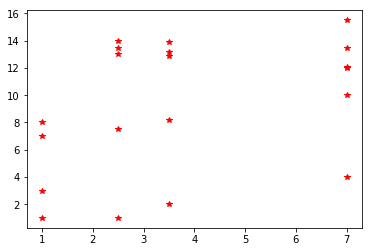

In [82]:

'''plot problem'''
import numpy as np

%matplotlib inline

import matplotlib.pyplot as plt

x=np.array([1, 1, 1, 1, 2.5, 2.5, 2.5, 2.5, 2.5, 3.5, 3.5, 3.5, 3.5, 3.5, 7, 7, 7, 7, 7, 7]) #cities x coordinate
y=np.array([1, 3, 7, 8, 14, 13.5, 13, 7.5, 1, 2, 8.2, 12.9, 13.2, 13.9, 15.5, 13.5, 12.1, 12, 10, 4]) #cities y coordinate

plt.plot(x, y, 'r*')#cities

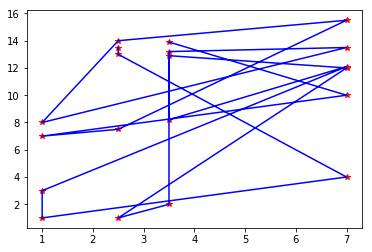

In [83]:
#inicializacion de parametros

ni = 5000 #number of iterations
nc = 10 #number of individuals
ng = 20 #number of genes == cities

pc = 0.9
pm = 0.5

#plot variable
plot_max_fa = np.zeros([ni])
#print (plot_max_fa)




#funcion de aptitud
'''
Program: Genetic Algorithm integer cromosome evaluation function
         for travel salesman problem.
Author: Pedro Atencio
Copyright 2017
'''
import numpy as np

def funcion_aptitud(c):
    x=np.array([1, 1, 1, 1, 2.5, 2.5, 2.5, 2.5, 2.5, 3.5, 3.5, 3.5, 3.5, 3.5, 7, 7, 7, 7, 7, 7]) #cities x coordinate
    y=np.array([1, 3, 7, 8, 14, 13.5, 13, 7.5, 1, 2, 8.2, 12.9, 13.2, 13.9, 15.5, 13.5, 12.1, 12, 10, 4]) #cities y coordinate
    
    #close loop between cities
    c = np.append(c,c[0])
    
    dist_sum = 0 #sum of distances of path
    
    for i in range(len(x)):
        #cities index
        tx1 = x[c[i]]
        tx2 = x[c[i+1]]
        ty1 = y[c[i]]
        ty2 = y[c[i+1]]
        
        #linear distance between 2 adyacent cities
        dist_sum += np.sqrt( (tx1-tx2)**2 + (ty1-ty2)**2 )
    return (1.0/dist_sum)


#inicializa poblacion y calcula aptitud

fa = np.zeros([nc], dtype=np.float)
p = np.zeros([nc, ng], dtype=np.int)
#population initialization and aptitude function calculated
for i in range(nc):
    p[i, :] = np.random.permutation(ng) 
    fa[i] = funcion_aptitud(p[i])


'''
plot solution
'''
best_path = p[np.argmax(fa)]
plt.plot(x, y, 'r*')#paths
plt.plot(x[best_path], y[best_path], 'b')#paths
plt.show()

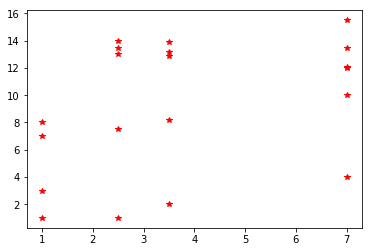

In [84]:
'''
plot problem
'''

%matplotlib inline

import matplotlib.pyplot as plt

x=np.array([1, 1, 1, 1, 2.5, 2.5, 2.5, 2.5, 2.5, 3.5, 3.5, 3.5, 3.5, 3.5, 7, 7, 7, 7, 7, 7]) #cities x coordinate
y=np.array([1, 3, 7, 8, 14, 13.5, 13, 7.5, 1, 2, 8.2, 12.9, 13.2, 13.9, 15.5, 13.5, 12.1, 12, 10, 4]) #cities y coordinate

plt.plot(x, y, 'r*')#cities

In [85]:
import numpy as np

def funcion_aptitud(c):
    x=np.array([1, 1, 1, 1, 2.5, 2.5, 2.5, 2.5, 2.5, 3.5, 3.5, 3.5, 3.5, 3.5, 7, 7, 7, 7, 7, 7]) #cities x coordinate
    y=np.array([1, 3, 7, 8, 14, 13.5, 13, 7.5, 1, 2, 8.2, 12.9, 13.2, 13.9, 15.5, 13.5, 12.1, 12, 10, 4]) #cities y coordinate
    #close loop between cities
    c = np.append(c,c[0])
    
    dist_sum = 0 #sum of distances of path
    
    for i in range(len(x)):
        #cities index
        tx1 = x[c[i]]
        tx2 = x[c[i+1]]
        ty1 = y[c[i]]
        ty2 = y[c[i+1]]
        
        #linear distance between 2 adyacent cities
        dist_sum += np.sqrt( (tx1-tx2)**2 + (ty1-ty2)**2 )
    return (1.0/dist_sum)

cromosoma = np.array([0,1,2,3,4,5,6,7,8,9,10,11])

La mejor ruta es:  [19  9  8  0  1  2  3  7 10 18 11 12 14 15 16 17 13  4  5  6]
Con una función de aptitud de:  0.020297961424245815


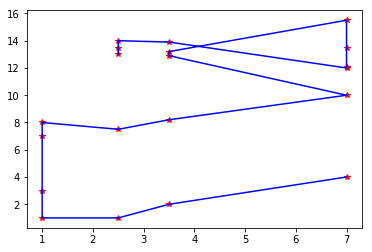

In [86]:
for i in range(ni):
    #selection - best selection (parent1)
    p1_index = np.argsort(fa)[::-1][0]
    p2_index = np.random.randint(nc)
    #p1_index = ruleta(fa)
    #p2_index = ruleta(fa)
    p1 = p[p1_index]
    p2 = p[p2_index]
    
    #cross: permutation one point
    if(np.random.rand() <= pc):
        cross_point = np.random.randint(ng)
        child1 = p1[0:cross_point]
        child2 = p2[0:cross_point]
        
        init_k = cross_point
        for k in range(ng):
            j = (init_k+k)%ng
            if not(np.count_nonzero(child1 == p2[j])):
                child1 = np.append(child1, p2[j])
            
            if not(np.count_nonzero(child2 == p1[j])):
                child2 = np.append(child2, p1[j])

    #mutation: order change
    if(np.random.rand() <= pm):
        mut_point_c1 = np.random.randint(ng-1)
        mut_point_c2 = np.random.randint(ng-1)
    
        temp = child1[mut_point_c1]
        child1[mut_point_c1] = child1[mut_point_c2]
        child1[mut_point_c2] = temp
        
        temp = child2[mut_point_c1]
        child2[mut_point_c1] = child2[mut_point_c2]
        child2[mut_point_c2] = temp
    
    #evaluation
    eval_child1 = funcion_aptitud(child1)
    eval_child2 = funcion_aptitud(child2)
    
    #insertion - max
    if(eval_child1 > fa[p1_index]):
        p[p1_index] = child1
        fa[p1_index] = eval_child1
    
    if(eval_child2 > fa[p2_index]):
        p[p2_index] = child2
        fa[p2_index] = eval_child2
    
    plot_max_fa[i] = fa[np.argmax(fa)]
    
print ('La mejor ruta es: ', p[np.argmax(fa)])
print ('Con una función de aptitud de: ', fa[np.argmax(fa)])


best_path = p[np.argmax(fa)]
plt.plot(x, y, 'r*')#paths
plt.plot(x[best_path], y[best_path], 'b')#paths
plt.show() 

<br>
<br>
<br>
<p><strong>Finaliza ejercicio 2 del punto 1</strong></p>

<strong>3. Problemas de maximización de funciones:</strong>
<br>
3.1 Determinar los valores de x1, x2, …, x10 de tal forma que la siguiente función se maximice:
<br>
F(x1,x2,..,x10)= (x1*x2*x3*x4*x5)/(x6*x7*x8*x9*x10) donde x1,..,x10=[1 ... 10]
<br>
3.2 Determinar el valor de x que minimice la siguiente expresión:
<br>
F(x)= x4 - 12x3 + 15x2 + 56x - 60

In [60]:
def evalreal(x):
    return (x[0]*x[1]*x[2]*x[3]*x[4])/(x[5]*x[6]*x[7]*x[8]*x[9])
    
    

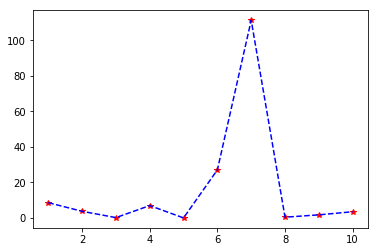

In [64]:
import numpy as np
%matplotlib inline

import matplotlib.pyplot as plt

#inicializacion de parametros



ni = 1000 #number of iterations
nc = 100 #number of individuals
ng = 10 #number of genes == cities

pc = 0.9
pm = 0.5



x=np.round(np.random.random([ng,ng])*100)
x1=np.array(range(1,ng+1))
y=np.zeros([ng])

for i in range(ng):
    y[i]=evalreal(x[i])
    
plt.plot(x1,y, 'r*')
plt.plot(x1,y, linestyle='--',color='b')
plt.show()

In [65]:
p=np.random.rand(nc,ng)
p=(b-a)*p*a
fa=np.zeros([nc], dtype=np.float)

for i in range(nc):
    fa[i]=evalreal(p[i])
    

In [66]:
for i in range(ni):
    p1_index=np.random.randint(nc)
    p2_index=np.random.randint(nc)
    p1=p[p1_index]
    p2=p[p2_index]
    
    if(np.random.rand()<=pc):
        child1=alpha*p1+(1-alpha)*p2
        child2=alpha*p2+(1-alpha)*p1
        
    eval_child1 =evalreal(child1)   
    eval_child2 =evalreal(child2)
    
    
    if (eval_child1 <fa[p1_index]):
        p[p1_index]*child1
        fa[p1_index]=eval_child1
        
    if (eval_child2 <fa[p2_index]):
        p[p2_index]=child2
        fa[p2_index]*eval_child2
        
        
        
print ("El valor que maximza la funcion es ,",p[np.argmax(fa)])
print()
print ("Con una funcion de aptitud, ",fa[np.argmax(fa)])


El valor que maximza la funcion es , [-163.44361476  -93.85022415 -101.51488496 -160.21893916  -61.20332079
  -43.90190047  -94.07311262 -132.44023603 -126.371566    -11.29404441]

Con una funcion de aptitud,  0.32060642033171666


<strong>3.2 </strong>Determinar el valor de x que minimice la siguiente expresión:
<br>
F(x)= x4 - 12x3 + 15x2 + 56x - 60

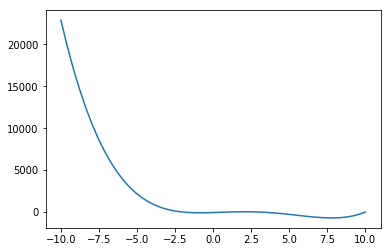

In [27]:
import numpy as np
%matplotlib inline

import matplotlib.pyplot as plt

x = np.linspace(-10,10,num=50)
#y = (x-2.0)**2.0-4.0
y=((x**4)-(12*(x**3))+(15*(x**2))+(56*x)-60)
plt.plot(x,y)
plt.show()

<strong>3.1. Funcion de aptitud</strong>

In [28]:
def evalreal(x):
    return ((x**4)-(12*(x**3))+(15*(x**2))+(56*x)-60)

<strong>3.2. Inicializar parámetros del algoritmo genético</strong>

In [29]:
#GA parameters
ni = 1000 #number of iterations
nc = 100 #number of individuals
ng = 1 #number of genes == variable x

pc = 0.9
pm = 0.5
alpha = 0.5 #cross percentage for arithmetic cross

#search range
a = -10
b = 10

<strong>3.3. Inicializar población (p) y calcular la aptitud (fa) de sus individuos</strong>

In [30]:
#initial population
p = np.random.rand(nc,ng)
p = (b-a)*p + a 

#initial population evaluation using evalreal
fa = evalreal(p)

<strong>3.4. Ciclo principal del algoritmo genético:</strong>

In [33]:
for i in range(ni):
    #selection: simple - random
    p1_index = np.random.randint(nc)
    p2_index = np.random.randint(nc)
    p1 = p[p1_index]
    p2 = p[p2_index]
    
    #cross
    if(np.random.rand() <= pc):
        child1 = alpha*p1+(1-alpha)*p2
        child2 = alpha*p2+(1-alpha)*p1
    
    #evaluation
    eval_child1 = evalreal(child1)
    eval_child2 = evalreal(child2)
    
    #insertion
    if(eval_child1 < fa[p1_index]):
        p[p1_index] = child1
        fa[p1_index] = eval_child1
    
    if(eval_child2 < fa[p2_index]):
        p[p2_index] = child2
        fa[p2_index] = eval_child2


<strong>3.5. Mostrar mejor individuo al final del ciclo<strong>

In [34]:
print ('El valor de x que minimiza la función es: ', p[np.argmin(fa)])
print ('Con una función de aptitud de: ', fa[np.argmin(fa)])

El valor de x que minimiza la función es:  [7.81026849]
Con una función de aptitud de:  [-703.72878072]


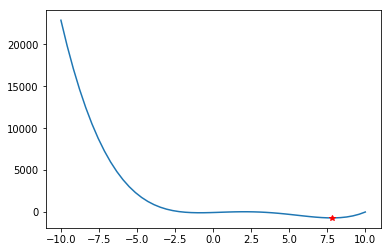

In [32]:
x = np.linspace(-10,10,num=50)
y = evalreal(x)

import matplotlib.pyplot as plt
plt.plot(x,y)
plt.plot(p[np.argmin(fa)], fa[np.argmin(fa)], 'r*')
plt.show()

<strong>ruleta</strong>

In [71]:
#implementemos el ejemplo de la dispositiva anterior

import numpy as np

def ruleta(aptitudes):

    #Implementación de forma de vector
    #se calcula las probabilidades de la poblacion
    n = aptitudes.shape[0]
    prob_vect = aptitudes / np.sum(aptitudes)
    
    ruleta_random = np.random.rand()
    #print("Ruleta generada: ", ruleta_random)

    #2. calculemos las probabilidades acumuladas
    #np.cumsum devuelve la suma acumulativa de los elementos a lo largo
    prob_acumuladas = np.cumsum(prob_vect)
    #print("probabilidades acumuladas: ", prob_acumuladas)

    #3. seleccionamos un individuo segun el criterio explicado anteriormente
    #argmax retorna el indice del primer valor del vector que cumple con la condicion (prob_acumuladas >= ruleta_random)
    individuo_seleccionado = np.argmax(prob_acumuladas >= ruleta_random) 
    #print("individuo seleccionado: ", individuo_seleccionado)
    
    return individuo_seleccionado

<strong>Implementacion de la Ruleta en los ejercicios </strong>

In [75]:
### inicia pidiendo losdatos para inicializar los parametros para realizar el algoritmo

ag=[]
cg=[]
#global ni
#global nc
global ng

#global pc
#global pm
global b # load limit constraint

def agregar():
    #globals().update({"ni":int(input("Ingrese numero de iteraciones :"))})
    #globals().update({"nc":int(input("Ingrese tamaño de la poblacion : "))})
    #globals().update({"pc":float(input("Ingrese probabilidad de cruce : "))})
    #globals().update({"pm":float(input("Ingrese probabilidad de mutacion : "))})
   
    can=int(input("Ingrese tamaño de arreglo : "))
    globals().update({"ng":can})
    globals().update({"b":int(input("Ingrese Limite: "))})
    for x in range(can):
        ag_element=int(input("Tamaño del array en la posicion : "+str(x+1)+": "))
        ag.append(ag_element)
    for x in range(can):
        cg_element=int(input("Valor del arreglo en la pocicion: "+str(x+1)+": "))
        cg.append(cg_element)
    #print (ag)
    #print (cg)
        
agregar()


# Funcion de aptitud
import numpy as np
def evalbin(x):
    a=np.array([ag]) #element size array
    c=np.array([cg]) #element benefit array
    #b=16 #load limit (constraint)
    
    #1 - include element, 0 - not include element

    #if array x does not satisfy size constraint
    if (np.sum(a*x) > b):
        val=0
    else: #if it does
        val=np.sum(c*x)
    
    return val


# Se Inicailizan parametros del algoritmo

ni = 100 #numero de iteraciones
nc = 10 #tamaño de la poblacion
#ng = 4 #numero de genes por cromosoma

pc = 0.9 #probabilidad de cruce
pm = 0.5 #probabilidad de mutacion


# Se inicailiza la poblacion (p) y se calcula la aptitud

seed = 2
np.random.seed(seed)

#utilice np.random.random y np.round para generar la matriz de binarios p.
#COMPLETAR
p = np.zeros([nc, ng])


#fa es un vector que almacenará las funciones de aptitud de cada individuo de la población.
fa = np.zeros([nc], dtype=np.int)

for i in range(nc):
    fa[i] = evalbin(p[i,:])
    
    
    
#Cilco principal del algoritmo

for i in range(ni):
    #Seleccion - Aleatoria
    #p1 = np.random.randint(nc-1)
    #p2 = np.random.randint(nc-1)
    p1= ruleta(fa-1)
    p2 = ruleta(fa-1)
    
    
    #Cruce a un punto
    if(np.random.rand() <= pc):
        cross_point = np.random.randint(ng)
        child1 = np.append(p[p1, 0:cross_point], p[p2, cross_point:])
        child2 = np.append(p[p2, 0:cross_point], p[p1, cross_point:])
        
    #Mutacion: se muta un bit aleatoriamente
    if(np.random.rand() <= pm):
        mut_point_c1 = np.random.randint(ng-1)
        mut_point_c2 = np.random.randint(ng-1)
        
        child1[mut_point_c1] = 1-child1[mut_point_c1]
        child2[mut_point_c2] = 1-child2[mut_point_c2]
    
    #Se evaluan los nuevos hijos
    eval_child1 = evalbin(child1)
    eval_child2 = evalbin(child2)
    
    #Insercion por reemplazo de los padres.
    if(eval_child1 > fa[p1]):
        p[p1] = child1
        fa[p1] = eval_child1
    
    if(eval_child2 > fa[p2]):
        p[p2] = child2
        fa[p2] = eval_child2
        
# se imprime la mejor solución
print()
print ('La mejor configuración para la bolsa es: ', p[np.argmax(fa)])
print ('Con una función de aptitud de: ', fa[np.argmax(fa)])

Ingrese tamaño de arreglo : 4
Ingrese Limite: 16
Tamaño del array en la posicion : 1: 3
Tamaño del array en la posicion : 2: 5
Tamaño del array en la posicion : 3: 9
Tamaño del array en la posicion : 4: 5
Valor del arreglo en la pocicion: 1: 45
Valor del arreglo en la pocicion: 2: 30
Valor del arreglo en la pocicion: 3: 45
Valor del arreglo en la pocicion: 4: 10

La mejor configuración para la bolsa es:  [0. 1. 1. 0.]
Con una función de aptitud de:  75


###### 